In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
locate_ppl = Locate_ppl(save_img=True)
person_embeding = PersonEmbeding()
recognizer = Recognizer("test")
data_base = EmbedingsManiger(cache_ram=True)

Using cache found in C:\Users\gabri/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(data_base.info)

set()


In [3]:
#emb_maniger.remove('ArturasRedHoody')

In [4]:
data_base.show_all()


In [5]:
#emb_maniger.remove("Arturas")

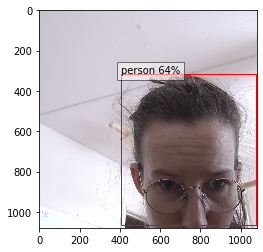

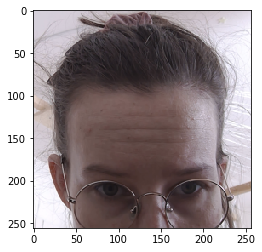

In [2]:
locate_ppl.set_path("images")
ppl = locate_ppl.snap()

In [7]:
plt.imshow(ppl[0])
plt.show()

NameError: name 'ppl' is not defined

1


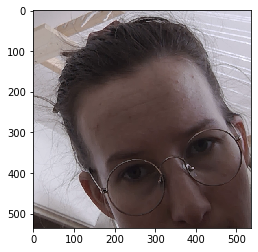

torch.Size([1, 512])
tensor([[0.2806, 0.7194]])


In [3]:
for found_ppl in locate_ppl:
    print(len(found_ppl))
    if len(found_ppl) > 0:
        for person in found_ppl:
            plt.imshow(person)
            plt.show()
        emb = person_embeding.embed(found_ppl)
        print(emb.shape)
        ans = recognizer(emb)
        print(ans)
    user_ans = input ("Om du vill forsätta, klicka enter. Om du vill avsluta, skriv NO") 
    if user_ans in ["NO", "No", "no"]: # same as: == "NO" or user_ans == "no" or user_ans == "No":
        break


In [5]:
a = []

In [4]:
def get_data(data, it=3):
    c = 0
    for img in locate_ppl:
        if len(img)==0:
            continue
        print(c)
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = person_embeding.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

0


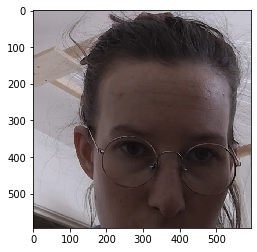

1


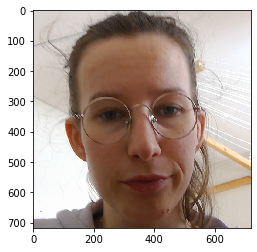

2


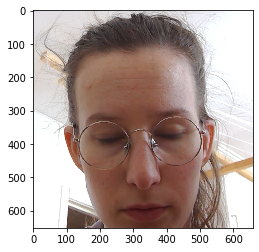

3


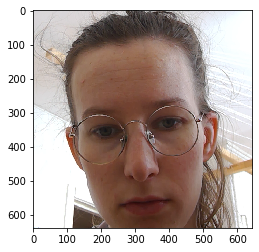

4


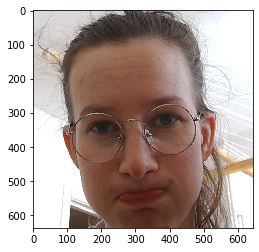

5


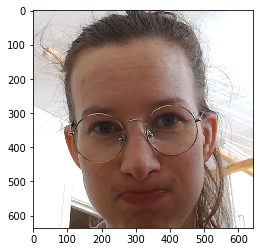

6


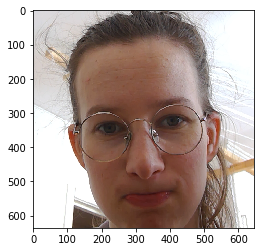

KeyboardInterrupt: 

In [6]:
locate_ppl.set_path("images/gabby")
locate_ppl.from_disk = False
person_embeding.nb_emb=4
get_data(a, 40)
len(a)

In [7]:
len(a)

28

In [13]:
ppl = lp.snap()

NameError: name 'lp' is not defined

In [9]:
#data_base.new("Gabby", ppl[0], a)
data_base.add("Gabby", a)
#data_base.remove("Gabby")

True

In [10]:
data_base.info

{'Arty', 'Gabby'}

In [11]:
for n in data_base.info:
    print(n, data_base.get_len(n))
    

Arty 40
Gabby 40


In [12]:
models = [Recognizer(n, load=False) for n in data_base.info]

In [16]:
for person in models:
    print(person.name)
    person.get_beter(data_base, 1000)

Arty
curret loss:0.0014623659895732998 after 1008 images
Gabby
curret loss:0.0015835632104426623 after 1008 images


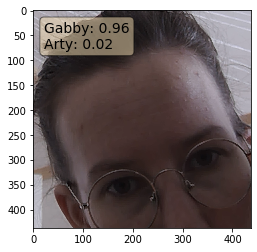

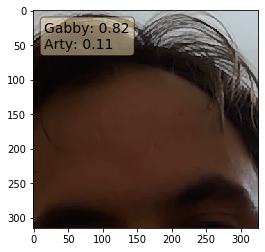

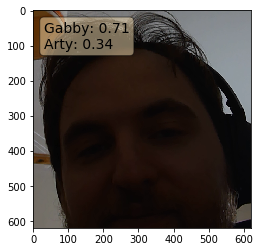

In [17]:
from collections import defaultdict
locate_ppl.path="images"
#lp.path="images/test"
locate_ppl.from_disk=False
for img in locate_ppl:
    if len(img) == 0:
        continue
    
    emb = person_embeding.embed(img)
    pred = defaultdict(list)
    for reco in models:
        r = reco(emb)
        for p in r:
            pred[reco.name].append(p[1].item())
    for idx, im in enumerate(img):
        fig, ax = plt.subplots()
        ax.imshow(im)
        textstr = '\n'.join([f"{p}: {v[idx]:.2f}" 
                        for p, v in sorted(pred.items(), reverse=True, key=lambda x: x[1][idx])])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
    plt.show()

    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [20]:
for m in models:
    m.save()